<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 21px; font-weight: bold; letter-spacing: 2px; text-align: center; ">This notebook uses a Car Tyres dataset which has been collected from an e-commerce website using webscraping technique.</p>

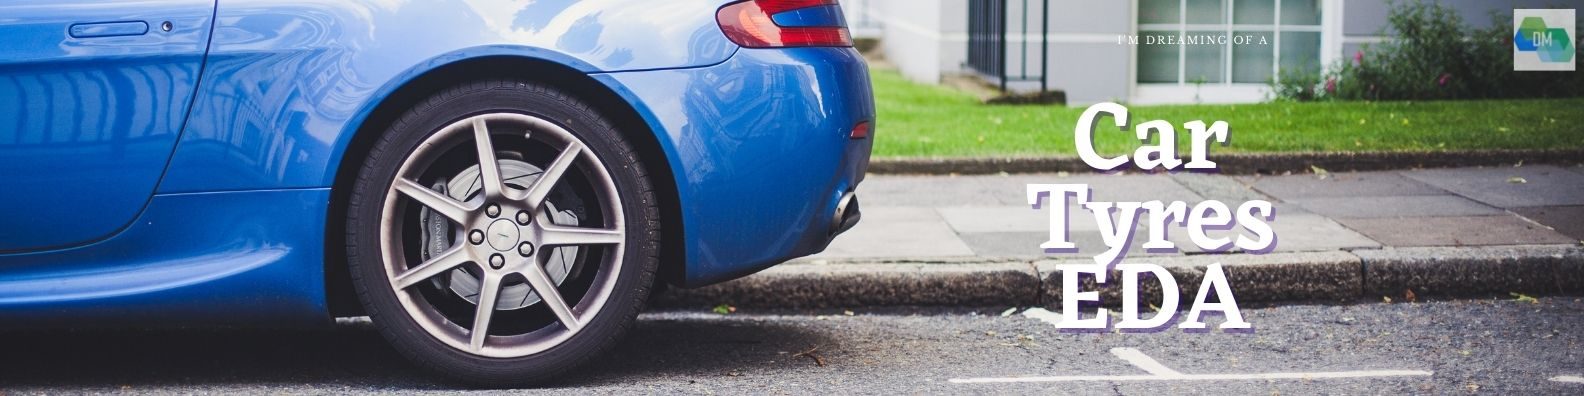

<h3 style="font-family: Arial;background-color:#50723C;color:white;text-align: center;font-size: 30px;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Dataset Details </centre></strong></h3>

##### This dataset contains 4350 samples with 11 attributes. There are some missing values in this dataset. Here are the columns in this dataset-

1. Brand: This indicates the Automotive Brand for which the product i.e. Tyres are suitable.
2. Model: This is the Car model for which the Tyres are a good match.
3. Submodel: This indicates the type of vehicle model i.e. Diesel, Petrol etc.
4. Tyre Brand: This column has the names of major Tyres manufacturers for this particular Brand - Maruti.
5. Serial No.: This is the Tyre model number.
6. Type: This indicates the type of Tyres i.e. Tube or Tubeless.
7. Load Index: This is the maximum weight that each tyre of the vehicle can carry at the maximum speed limit as specified by the manufacturer.
8. Size: This is the standard tyre size indicating the width, profile, radial construction and rim size.
9. Selling Price: This is the selling price of the tyre.
10. Original Price: This is the actual/ original price of the tyre.
11. Rating: Average customer ratings on a scale of 5.   

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 17px; font-weight: bold; letter-spacing: 2px; text-align: center; ">This EDA will answer some interesting questions like-</p>

1. Demand for Tube vs. Tubeless tyres
2. Major players in the market
3. Which are the top 5 brands for most tyre models?
4. Which Maruti model has the highest number of tyre models/serial no. and from which tyre brand?
5. Do expensive tyres have higher ratings?
6. Average Selling Price by Tyre Brand

<h3 style="font-family: Trebuchet MS;background-color:#50723C;color:WHITE;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#50723C;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝  </centre></strong></h3>

In [2]:
df = pd.read_csv('Car_Tyres_Dataset.csv',thousands=',')

In [3]:
df_row_count, df_column_count = df.shape
print('Total number of rows:', df_row_count)
print('Total number of columns:', df_column_count)

Total number of rows: 4350
Total number of columns: 11


In [4]:
df.head()

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,3255,3255,5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,3406,3406,4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,3490,4319,4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,4484,4244,NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,3025,3025,4.2


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Load Index,4350.0,84.101609,6.716769,69.0,79.00,86.0,88.0,106.0
Selling Price,4350.0,4724.982989,1848.303937,2248.0,3400.00,4300.0,5594.0,20257.0
Original Price,4350.0,4762.234943,1869.111942,2248.0,3401.25,4319.0,5594.0,20257.0
Rating,2248.0,4.297598,0.698433,1.9,4.00,4.3,5.0,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   int64  
 9   Original Price  4350 non-null   int64  
 10  Rating          2248 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 374.0+ KB


In [7]:
df.isna().sum()

Brand                0
Model                0
Submodel             0
Tyre Brand           0
Serial No.           0
Type                 0
Load Index           0
Size                 0
Selling Price        0
Original Price       0
Rating            2102
dtype: int64

In [8]:
#replace NaN values
df=df.fillna(0)
df.iloc[:5]

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,3255,3255,5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,3406,3406,4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,3490,4319,4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,4484,4244,0.0
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,3025,3025,4.2


In [9]:
print ("Unique values are:\n",df.nunique())

Unique values are:
 Brand               1
Model              34
Submodel          178
Tyre Brand         16
Serial No.        114
Type                2
Load Index         27
Size               47
Selling Price     367
Original Price    371
Rating             23
dtype: int64


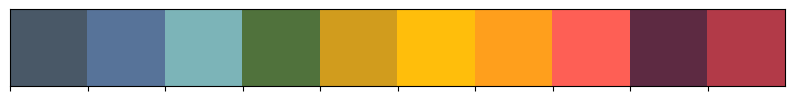

In [10]:
#color palette for this notebook
colors = ["#495867","#577399","#7CB4B8","#50723C","#D19C1D","#FFBE0B","#FF9F1C","#FE5F55","#5D2A42","#b23a48"]
palette = sns.color_palette(palette = colors)

sns.palplot(palette, size =1)
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#50723C;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>EDA 🔍  </centre></strong></h3>

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Demand for Tube vs. Tubeless tyres</p>

In [11]:
# count of products by Resolution
df['Model'].groupby(df['Type']).count().sort_values(ascending=False)

Type
Tubeless    4061
Tube         289
Name: Model, dtype: int64

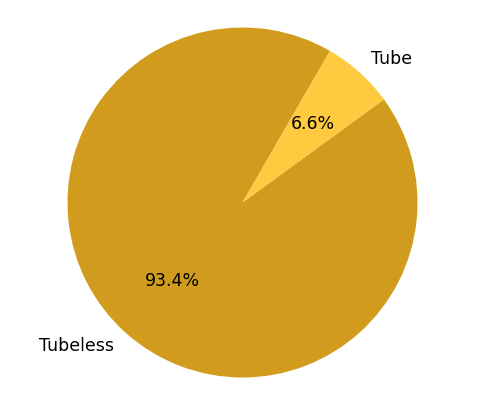

In [12]:
# Tyre Type distribution
labels = 'Tubeless', 'Tube'
sizes = [4061,289]
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#D19C1D","#FDCA40"],autopct='%1.1f%%',startangle=60,textprops={'color':'black','fontsize':12.5})
ax.axis('equal')
plt.show()



<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Major players in the market</p>

In [13]:
# count of products by Resolution
df['Model'].groupby(df['Tyre Brand']).count().sort_values(ascending=False)

Tyre Brand
BridgeStone    610
GoodYear       501
CEAT           449
JKTyre         445
Apollo         400
Yokohama       379
Continental    339
Falken         269
MRF            263
Firestone      171
UltraMile      149
Michelin       130
Pirelli        104
Hankook         65
Kumho           57
Maxxis          19
Name: Model, dtype: int64

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Which are the top 5 brands with most tyre models?</p>

<Axes: xlabel='count', ylabel='Tyre Brand'>

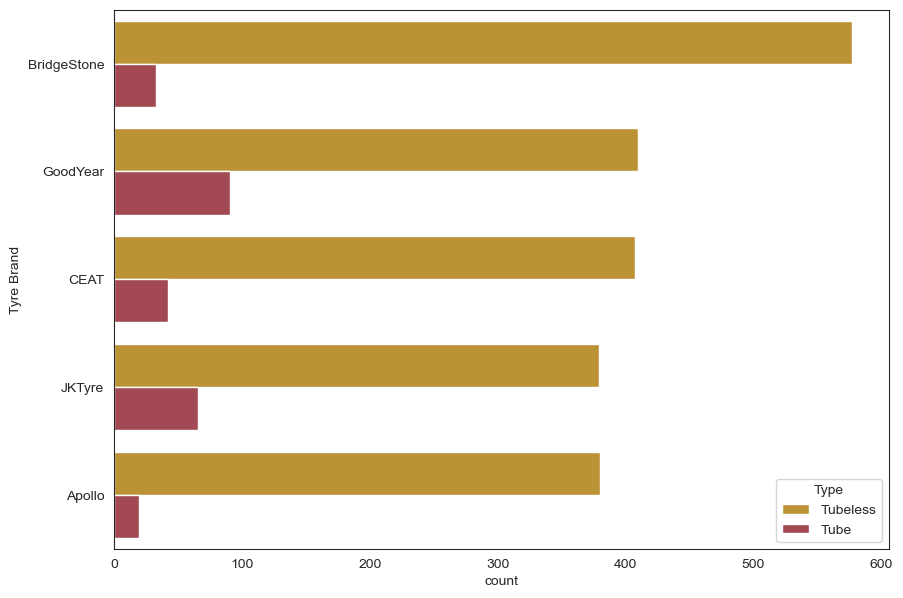

In [14]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Tyre Brand", hue="Type", data=df, palette=["#D19C1D","#b23a48"],order=df["Tyre Brand"].value_counts().iloc[:5].index)

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Top 5 Models with most tyre brands</p>

<Axes: xlabel='count', ylabel='Model'>

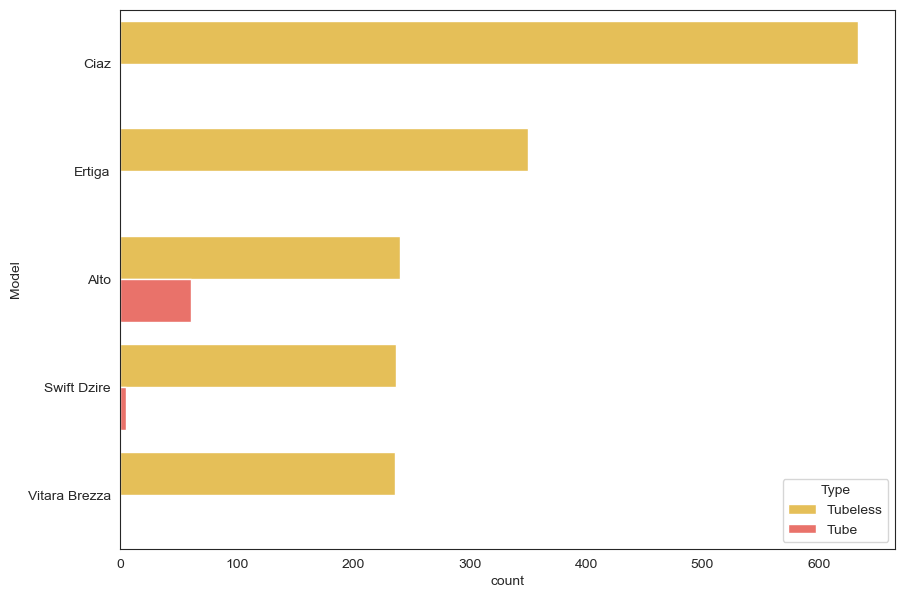

In [15]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Model", hue="Type", data=df, palette=["#FDCA40","#FE5F55"],order=df["Model"].value_counts().iloc[:5].index)

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Which Maruti model has the highest number of tyre models/serial no. ?</p>

<Axes: xlabel='count', ylabel='Model'>

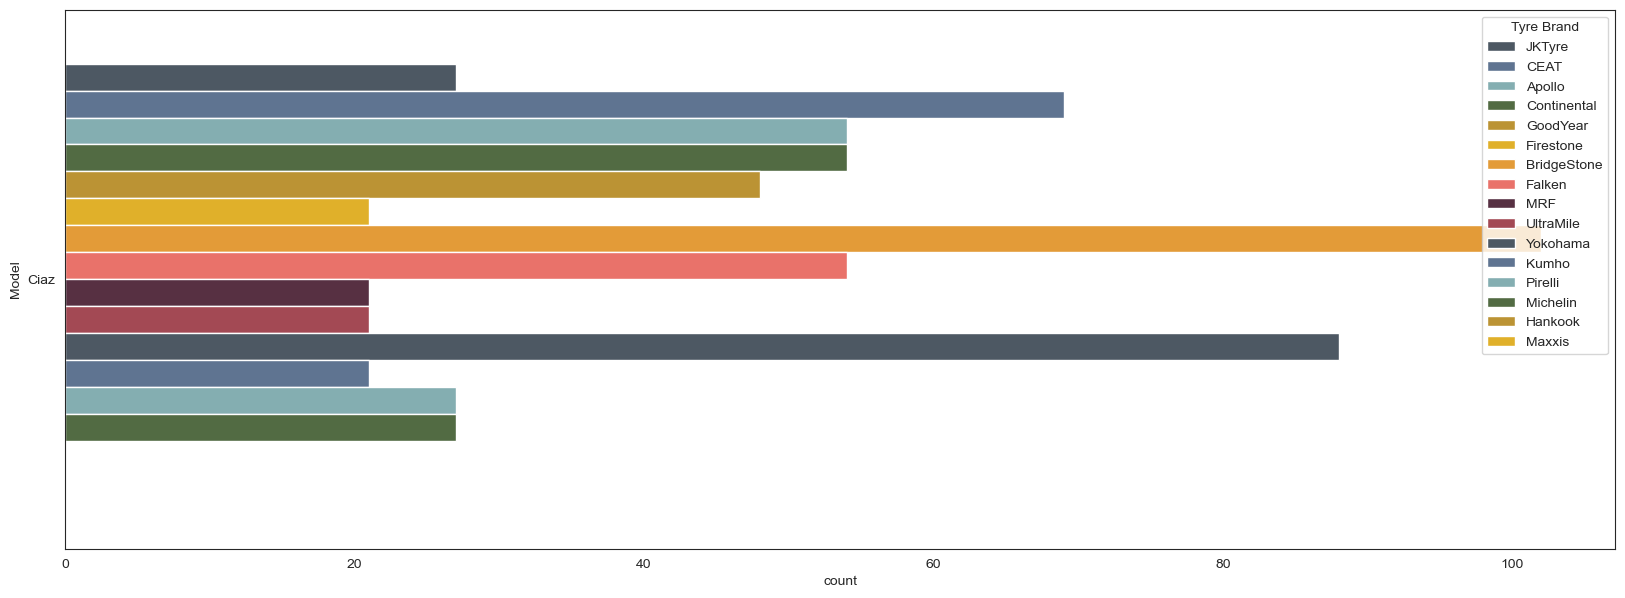

In [16]:
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.countplot(y="Model", hue="Tyre Brand", data=df, palette=colors,order=df["Model"].value_counts().iloc[:1].index)

**Ciaz Model with most tyre brands**

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Do expensive tyres have higher ratings?

</p>

In [17]:
round(df.groupby('Tyre Brand')['Rating'].mean().sort_values(ascending=False),1)

Tyre Brand
CEAT           3.4
Michelin       3.3
BridgeStone    3.2
Pirelli        3.0
MRF            2.8
Apollo         2.8
Yokohama       2.3
GoodYear       2.0
JKTyre         1.8
UltraMile      1.7
Falken         1.5
Continental    0.7
Firestone      0.2
Hankook        0.0
Kumho          0.0
Maxxis         0.0
Name: Rating, dtype: float64

In [18]:
#filter dataframe
df_p=df[(df["Rating"]>= 4.0) & (df["Selling Price"]>= 5000)]
df_p.iloc[:5]

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
33,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Amazer 4G Life,Tubeless,88,185/70 R 15,5429,5429,4.0
34,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Ainac 4G,Tubeless,88,185/70 R 16,5359,5359,5.0
42,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Ainac 4G,Tubeless,88,185/70 R 24,5359,5359,5.0
43,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Amazer 4G Life,Tubeless,88,185/70 R 25,5429,5429,4.0
46,Maruti,Swift Dzire,ZDI (Petrol) New,Apollo,Ainac 4G,Tubeless,88,185/70 R 28,5359,5359,5.0


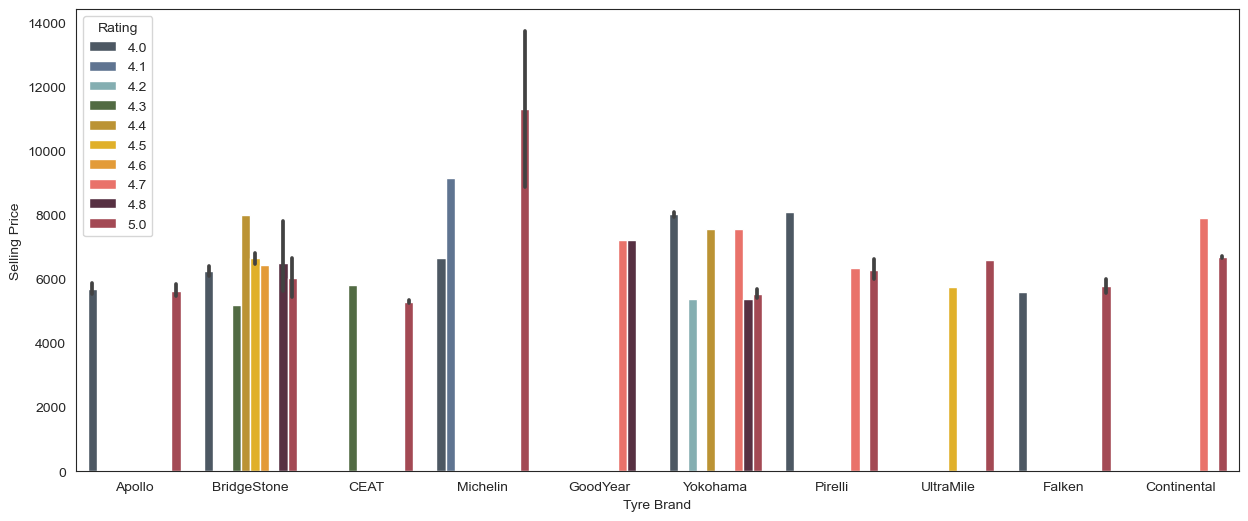

In [19]:
# Rating vs Tyre Brand
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling Price', x='Tyre Brand', data=df_p, hue='Rating',palette=colors)

<p style="font-family: Georgia; line-height: 2;color:#50723C; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; ">Average Selling Price by Tyre Brand

</p>

In [20]:
df.groupby('Tyre Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Tyre Brand
Pirelli        7359.0
Michelin       6893.0
Maxxis         6232.0
Yokohama       6120.0
Continental    5250.0
BridgeStone    5190.0
Falken         5066.0
Hankook        4980.0
Kumho          4650.0
Apollo         4631.0
UltraMile      4475.0
CEAT           4130.0
GoodYear       4011.0
MRF            3718.0
JKTyre         3602.0
Firestone      3484.0
Name: Selling Price, dtype: float64